## **CHAPTER 7 군집화**

## **01 K-평균 알고리즘 이해**

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 80% !important; }</style>"))

**K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘이다. K-평균은 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법이다.**

**군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행한다.**

> **모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법이다.**

![test](./img/군집3.jpg)

> **1. 먼저 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓는다.**

> **2. 각 데이터는 가장 가까운 중심점에 소속**

> **3. 이렇게 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동한다.**

> **4. 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경한다.**

> **5. 다시 중심을 소속된 데이터의 평균 중심으로 이동한다.**

> **6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료한다. 그렇지 않으면 다시 4번의 과정을 거쳐서 소속을 변경하고 이 과정을 반복**

#### **K-평균의 장점**

> **일반적인 군집화에서 가장 많이 활용되는 알고리즘이다.**

> **알고리즘이 쉽고 간결하다.**

#### **K-평균의 단점**

> **거리 기반 알고리즘으로 속성(feature)의 개수가 많을 경우 군집화 정확도가 떨어진다.(이를 위해 PCA로 차원 감소를 적용 해야 할 수도 있다.)**

> **반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려진다.**

> **몇 개의 군집(Cluster)을 선택해야 할지 가이드하기가 어렵다.**

### **사이킷런 KMeans 클래스 소개**

**사이킷런 패키지는 K-평균을 구현하기 위해 KMeans 클래스를 제공한다. KMeans 클래스는 다음과 같은 초기화 파라미터를 가지고 있다.**

**이 중 중요한 파라미터는 다음과 같다.**

> **KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_clusters이며, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미한다.**

> **init는 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하고 않고 일반적으로 k-means++방식으로 최초 설정**

> **max_iter는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.**

**KMeans는 사이킷런의 비지도학습 클래스와 마찬가지로 fit(데이터 세트) 또는 fit_transform(데이터 세트) 메서드를 이용해 수행하면 된다. 이렇게 수행된 KMeans 객체는 군집화 수행이 완료돼 군진화와 관련된 주요 속성을 알 수가 있다.**

> **labels_: 각 데이터 포인트가 속한 군집 중심점 레이블**

> **cluster_centers_:각 군집 중심점 좌표(shape는 [군집 개수, 피처 개수]).이를 이용하면 군집 중심점 좌표가 어딘지 시각화할 수 있다.**

### **K-평균을 이용한 붓꽃 데이터 세트 군집화**

**붓꽃 데이터를 이용해 K-평균 군집화를 수행한다. 붓꽃의 꽃받침(Sepal)과 꽃잎(Petal) 길이와 너비에 따른 품종을 분류하는 데이터 세트이다.**

**꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인해 보고, 이를 분류 값과 비교한다.**

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
# 데이터 불러오기
iris = load_iris()

# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [4]:
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# 붓꽃 데이터 세트를 3개 그룹으로 군집화한다. 이를 위해 n_cluster는 3, 초기 중심 설정 방식은 디폴트 값인 k-means++,
# 최대 반복 횟수 역시 디폴트 값인 max_iter=300으로 설정한다.
# KMeans 객체를 만들고, 여기에 fit()을 수행한다.

# fit을 수행해 irisDF 데이터에 대한 군집화 수행 결과가 kmeans 객체 변수로 반환됐다.
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,random_state=0).fit(irisDF)

In [6]:
# kmeans의 labels_ 속성값을 확인해 보면 irisDF의 각 데이터가 어떤 중심에 속하는지를 알 수 있다.
print(kmeans.labels_) # 각각의 레코드가 어디 군집에 속하는지를 알 수 있다.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [7]:
# 이 label_의 값을 'cluster'칼럼으로 irisDF에 추가한다.
irisDF['cluster'] =  kmeans.labels_

In [8]:
irisDF.tail(50)

,sepal_length,sepal_width,petal_length,petal_width,cluster
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,0
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,0
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


In [9]:
# 실제 붓꽃 품종 분류값과 얼마나 차이가 나는지로 군집화가 효과적으로 됐는지 확인한다.
# DataFrame에 group by 연산을 실제 분류 값인 target과 군집화 분류 값인 cluster 레벨로 적용해 target과 cluster 값 개수를 비교할 수 있다.
irisDF['target'] = iris.target
# irisDF의 target,cluster를 기준으로 sepal_length를 
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
iris_result # target과 cluster를 group으로 묶어 sepal_length의 group(target, cluster)를 count한다.

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

**분류 타깃이 0값인 데이터는 1번 군집으로 모두 잘 그루핑됐다. Target 1 값 데이터는 2개만 2번 군집으로 그루핑됐고, 나머지 48개는 모두 0번 군집으로 그루핑됐다. 하지만 Target 2값 데이터는 0번 군집에 14개, 2번 군집에 36개로 분산돼 그루핑**

**이번에는 붓꽃 데이터 세트의 군집화를 시각화해 본다. 2차원 평면상에서 개별 데이터의 군집화를 시각적으로 표현하려고 한다. 붓꽃 데이터 세트의 속성이 4개이므로 2ㅏ원 평면에 적합치 않아 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤에 X좌표, Y좌표로 개별 데이터를 표현한다.**

In [10]:
from sklearn.decomposition import PCA # PCA import

pca = PCA(n_components=2) # 4개의 feature를 2개로 차원 축소하기위한 pca 객체 생성
pca_transformed = pca.fit_transform(iris.data) # iris.data(feature)들을 2개의 차원으로 축소하기 위해 .fit_transform

irisDF['pca_x'] = pca_transformed[:,0] # 축소된 제 1 컴포넌트
irisDF['pca_y'] = pca_transformed[:,1] # 축소된 제 2 컴포넌트
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


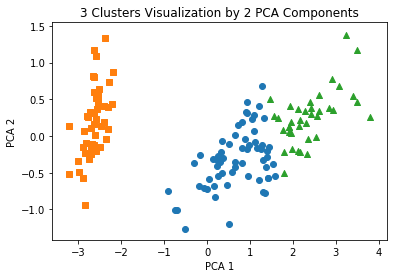

In [11]:
# 각 군집별로 cluster 0은 마커 'o', cluster 1은 마커 's', cluster 2은 마커 '^'로 표신한다.
# 맷플롯립의 산점도는 서로 다른 마커를 한 번에 표현할 수 없으므로 마커별로 별도의 산점도를 수행한다.

# 군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o,s,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

**Cluster 1을 나타내는 네모('s')는 명확히 다른 군집과 잘 분리돼 있다. Cluster 0을 나타내는 동그라미('o')와 Cluster 2를 나타내는 세모('^')는 상당 수준 분리돼 있지만, 네모만큼 명확하게 분리돼 있지 않음을 알 수 있다. Cluster 0과 1의 경우 속성의 위치 자체가 명확히 분리되기 어려운 부분이 존재한다.**

### **군집화 알고리즘 테스트를 위한 데이터 생성**

**사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해 보기 위한 간단한 데이터 생성기를 제공한다. 대표적인 군집화용 데이터 생성기로는 make_blobs()와 make_classification() API가 있다. 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있다. 둘 중에 어떤 것을 사용하든 큰 차이는 없지만, make_blobs()는 개별 군집의 중심점과 표준 편차 제어 기능이 추가돼 있으며, make_classification()은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있다. 둘 다 분류 용도로 테스트 데이터 생성이 가능하다.**

> **이 외에 make_circle(), make_moon() API는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는데 사용된다.**

**make_blobs()의 호출 파라미터는 다음과 같다.**

> **n_samples:생설할 총 데이터의 개수이다. 디폴트는 100개이다.**

> **n_features: 데이터의 피처 개수이다. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처는 y 좌표상에 표현한다.**

> **centers: int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타낸다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미한다.**

> **cluster_std: 생성될 군집 데이터의 표준 편차를 의미한다. 만일 float 값 0.8과 같은 경태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어진다. [0.8,1,2,0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만든다. 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용한다.**

In [12]:
# X, y = make_blobs(n_samples=200, n_feature=2, centers=3, random_state=0)을 호출하면 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진,
# 피처 데이터 세트 X와, 동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환된다.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# 데이터 샘플은 200, 피처의 개수는 2개, 군집의 개수는 3개, 생성될 군집 데이터의 표준편차는 0.8
X,y = make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8,random_state=0)
print(X.shape,y.shape)

# y target 값의 분포를 확인
# 피처 데이터 세트 X는 200개의 레코드와 2개의 피처를 가지므로 shape은 (200,2), 군집 타깃 데이터 세트인 y의 shape은 (200,)
# 그리고 3개의 cluster의 값은 [0,1,2]이며 각각 67,67,66개로 균일하게 구성되어 있다.
unique, counts = np.unique(y, return_counts=True) # np.unique(y 레이블 값의 유일 값들을 unique에 각각의 유일 값들의 갯수(return_counts=Ture)를 counts에 할당한다.)
# unique: 0,1,2(군집 3개), counts: 67,67,66 (군집별 데이터 포인터 개수)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [13]:
# 좀 더 데이터 가공을 편리하게 하기 위해서 위 데이터 세트를 DataFrame으로 변경한다. 피처의 이름은 ftr1, ftr2이다.

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


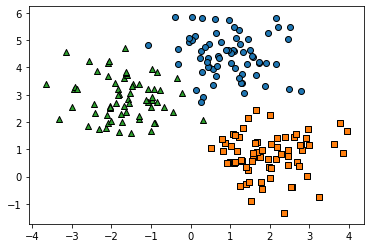

In [14]:
# 이제 make_blob()으로 만든 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인한다.
# 타깃값 0,1,2에 따라 마커를 다르게 해서 산점도를 그려보면 
# 다음과 같이 3개의 구분될 수 있는 군집영역(make_blobs()이 y 반환 값)으로 피처 데이터 세트가 만들어졌음을 알 수 있다.
target_list = np.unique(y) # 0,1,2 (3개의 군집 영역으로 구분)
# 각 타깃별 산점도의 마커 값.
markers = ['o','s','^','P','D','H','x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target == 0, target == 1, target ==2로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target] # 각 epoche 마다 target(0,1,2)일 때의 레코드를 target_cluster에 할당
    plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolors='k',marker=markers[target]) # feature 2개를 x축, y축으로 하여 산점도를 그린다.
plt.show()

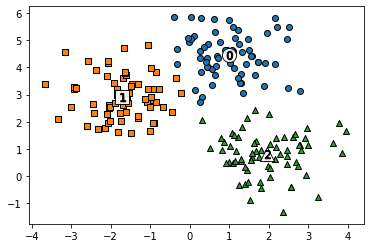

In [15]:
# 이번에는 이렇게 만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤에 군집별로 시각화해 본다.
# 먼저 KMeans 객체에 fit_predict(X)를 수행해 make_blobs()의 피처 데이터 세트인 X 데이터를 군집화한다.
# 이를 앞에서 구한 clusterDF DataFrame의 'kmeans_label'칼럼으로 저장한다.
# 그리고 KMeans 객체의 cluster_centers_ 속성은 개별 군집의 중심 위치 좌표를 나타내기 위해 사용한다.

# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=200,random_state=0) # 군집 수: 3, 반복수: 200, 계산방식:k-means
cluster_labels = kmeans.fit_predict(X) # X 데이터에 군집화한 결과를 cluster_labels에 할당
clusterDF['kmeans_label'] = cluster_labels # 클러스터된 레이블을 데이터 프레임에 kmeans_label에 할당

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_ # 중심 위치 좌표 추출
unique_labels = np.unique(cluster_labels) # 군집화 결과 레이블(cluster_labels)의 유일 값을 추출하여 unique_labels에 할당
markers=['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label] # 각 epoche 마다 target(0,1,2)일 때의 레코드를 label_cluster에 할당
    center_x_y = centers[label] # 각 레이블(0,1,2)의 중심위치 좌표를 할당
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolors='k',marker=markers[label]) # x축, y축을 2개의 feature로 label 위치들을 산점도로 표현
    
    # 군집별 중심 위치 좌표 시각화
    # make_blobs()의 타깃과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있다.(그래서 산점도의 마커가 서로 다를 수 있다.)
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', 
               alpha=0.9,edgecolors='k',marker = markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
               edgecolors='k',marker='$%d$'%label)
plt.show()

In [16]:
# groupby 함수를 통해 target(label)을 기준으로 kmeans_label(군집) 분포를 counts 한다.
# Target 0이 cluster 0으로 target 1이 label 2로, target 2이 label 1로 거의 대부분 잘 매핑됐다.
# make_blobs()은 cluster_std 파라미터로 데이터의 분포도를 조절한다. (자세한 내용과 그림은 p415 참조)
# cluster_std가 작을수록 군집 중심에 데이터가 모여 있으며, 클수록 데이터가 퍼져 있음을 알 수 있다.
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


## **02 군집 평가(Cluster Evaluation)**

**앞의 붓꽃 데이터 세트의 경우 결괏값에 품종을 뜻하는 타깃 레이블이 있었고, 군집화 결과를 이 레이블과 비교해 군집화가 얼마나 효율적으로 됐는지 짐작할 수 있었다. 하지만 대부분의 군집화 데이터 세트는 이렇게 비교할 만한 타깃 레이블을 가지고 있지 않다.**

**또한 군집화는 분류(Classification)와 유사해 보일 수 있으나 성격이 많이 다르다. 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가지고 있다.**

**그렇다면 군집화가 효율적으로 잘 됐는지 평가할 수 있는 지표에는 어떤 것이 있을까? 비지도학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하기는 어렵다. 그럼에도 불구하고 군집화의 성능을 평가하는 대표적인 방법으로 실루엣 분석을 이용.**

### **실루엣 분석의 개요**

**군집화 평가 방법으로 실루엣 분석(silhouette analysis)이 있다. 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다.**

> **효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미이다.**

> **군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것이다.**

**실루엣 분석은 실루엣 계수(silhouette coefficient)를 기반으로 한다. 실루엣 계수는 개별 데이터가 가지는 군집화 지표이다. 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표이다.**

![test](./img/실루엣1.jpg)

> **예를 들어 파란색 구역이 Cluster A, 연두색 구역이 Cluster B, 빨간색 구역이 Cluster C 라 가정한다.**

> **파란색 구역(Cluster A) 안에 X(i)의 파란색선은 자신이 속한 클러스터내의 다른 데이터 포인트까지의 거리**

> **a는 데이터에서 자식이 속한 클러스터내의 다른 데이터 포인트들의 평균 거리**

> **X(i)의 연두색선은 가장 가까운 타 클러스터의 다른 데이터 포인트들의 거리**

**특정 데이터 포인트의 실루엣 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i), 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 b(i)를 기반으로 계산된다.**

> **두 군집 간의 거리가 얼마나 떨어져 있는가의 값은 b(i) - a(i)이며 이 값을 정규화하기 위해 MAX(a(i),b(i)) 값으로 나눈다.**

**따라서 i번째 데이터 포인트의 실루엣 계수 값 s(i)는 다음과 같이 정의한다.**

![test](./img/실루엣2.png)

> **실루엣 계수는 -1에서 1사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것이다.**

> **-값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻한다.**

**사이킷런은 이러한 실루엣 분석을 위해 다음과 같은 메서드를 제공한다.**

> **sklearn.metrics.silhouette_samples(X,labels,metric='euclidean',kwds): 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환한다.**

> **sklearn.metrics.silhouette_score(X,labels,metric='euclidean',sample_size=None,kwds): 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣 계수 값을 평균해 반환한다. 즉, np.mean(silhouette_samples())이다. 일반적으로 이 값이 높을수록 군집화가 어느 정도 잘 됐다고 판단할 수 있다. 하지만 무조건 이 값이 높다고 해서 군집화가 잘 됐다고 판단할 수는 없다.**

**좋은 군집화가 되려면 다음 기준 조건을 만족해야 한다.**

> **1.전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score() 값은 0 ~ 1 사이의 값을 가지며, 1에 가까울수록 좋다.**

> **2.하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다. 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아니다.**

### **붓꽃 데이터 세트를 이용한 군집 평가**

**앞의 붓꽃 데이터 세트의 군집화 결과를 실루엣 분석으로 평가해 본다. 이를 위해 sklearn.metric 모듈의 silhouette_samples()와 silhouette_score()를 이용한다.**

In [17]:
# 실루엣 분석을 하기전 필요한 패키지들을 임포트
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# 데이터를 불러와서 데이터 프레임으로 변환하는 과정
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)

# KMeans(k-평균 알고리즘)를 통해 3개의 군집을 형성하고 반복수는 300회, 계산 방식은 'k-means++'
# 군집이 할당된 kmeans객체의 레이블을 irisDF 데이터 프레임의 새로운 열로 추가
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_sample() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data,irisDF['cluster'])
print('붓꽃 데이터 세트 Silhoette Analysis Score: {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_sample() return 값의 shape (150,)
붓꽃 데이터 세트 Silhoette Analysis Score: 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


**평균 실루엣 계수 값이 약 0.553이다. 1번 군집의 경우 0.8 이상의 높은 실루엣 계수 값을 나타내고 있다. 1번 군집이 아닌 다른 군집의 경우 실루엣 계수 값이 평균보다 낮기 때문일 것이다.**

In [18]:
# 군집별 평균 실루엣 계수 값을 알아본다.
# irisDF DataFrame에서 군집 칼럼별로 group by하여 silhouette_coeff 칼럼의 평균값을 구하면 된다.

# 1번 군집은 실루엣 계수 평균 값이 약 0.79인데 반해, 0번은 약 0.41, 2번은 0.45로 상대적으로 평균값이 1번에 비해 낮다.
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### **군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

**전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수는 없다. 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있다.**

**개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에 K-평균의 적절한 군집 개수가 설정됐다고 판단할 수 있다.**

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


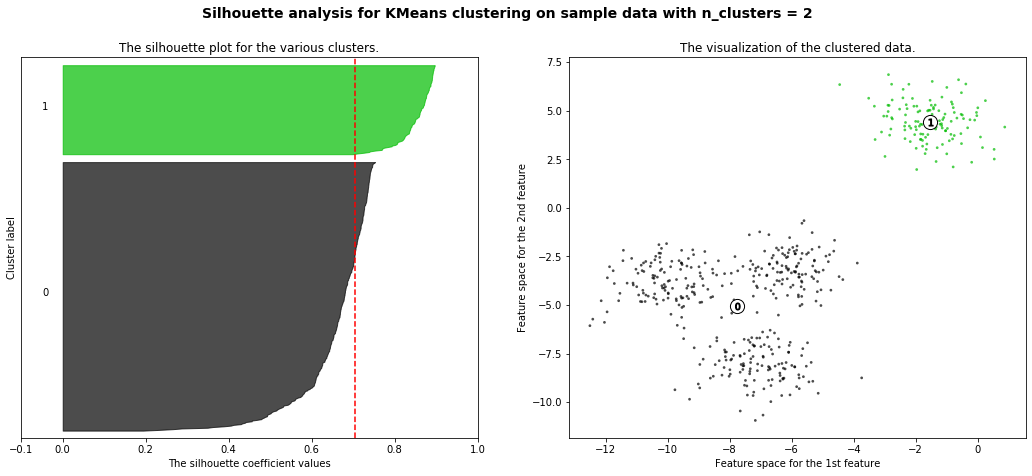

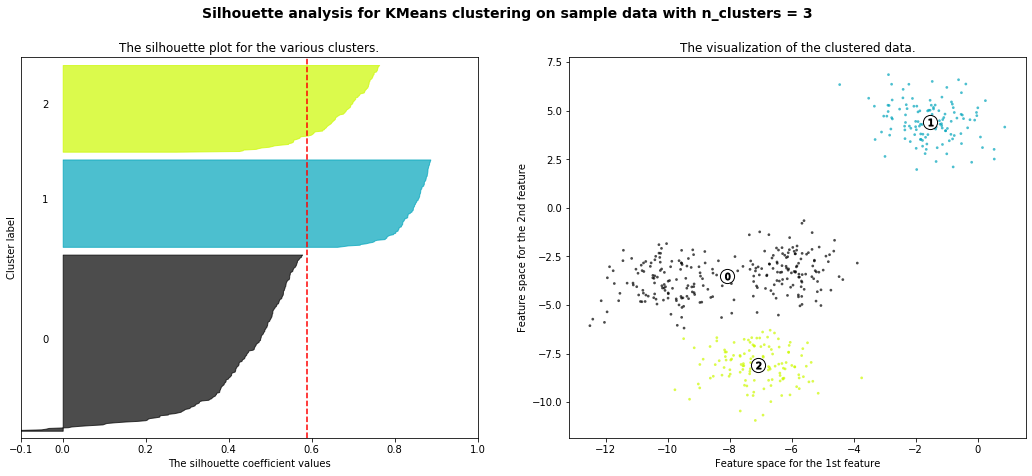

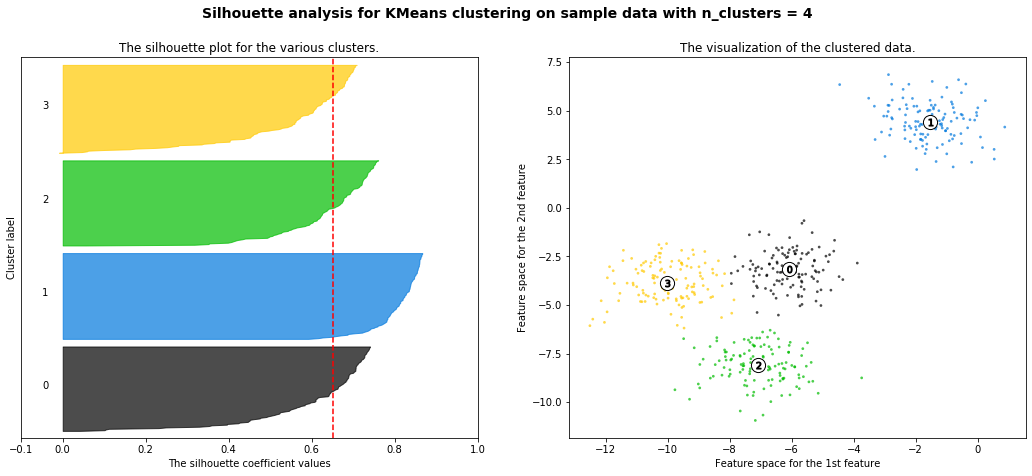

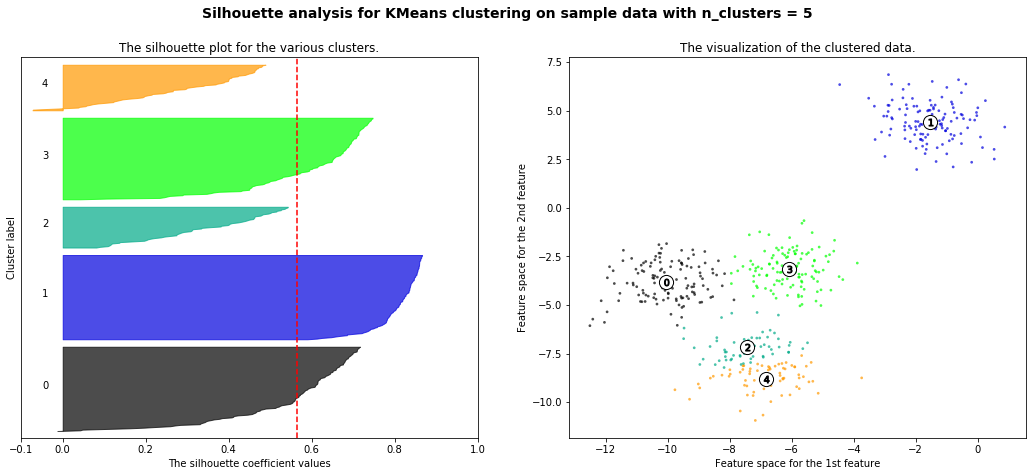

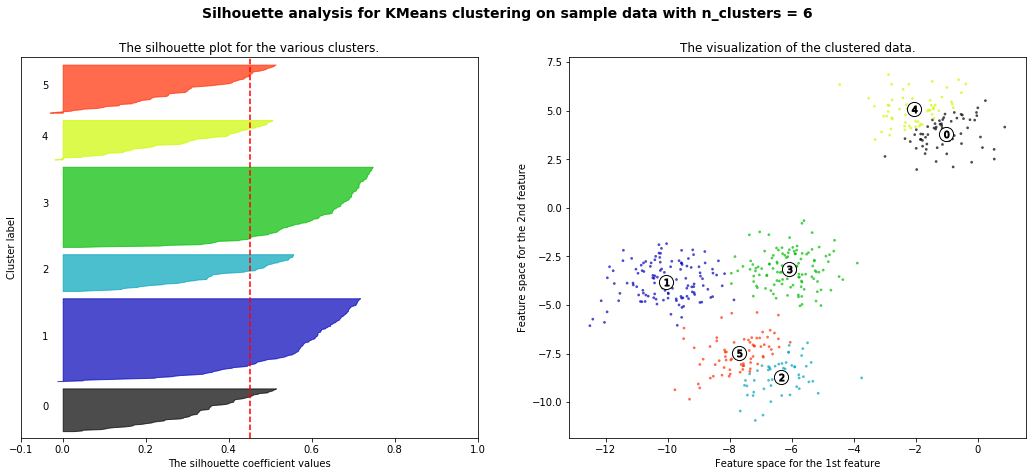

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

![test](./img/실루엣3.png)

**첫 번째 경우는 주어진 데이터에 대해서 군집의 개수 2개를 정했을 때이다. 이때 평균 실루엣 계수, 즉 silhouette_score는 약 0.704로 매우 높게 나타났다.**

> **하지만 이렇게 2개로 군집화하는 것이 최적의 방법일까?**

**다음 그림에서 왼쪽 부분은 개별 군집에 속하는 데이터의 실루엣 계수를 2차원으로 나타낸 것이다. X축은 실루엣 계수 값이고, Y축은 개별 군집과 이에 속하는 데이터이다. 개별 군집은 Y축에 숫자 값으로 0,1로 표시돼 있다. 이에 해당하는 데이터는 일일이 숫자 값으로 표시되지 않았지만, Y축 높이로 추측할 수 있다. 그리고 점선으로 표시된 선은 전체 평균 실루엣 계수값을 나타낸다.**

**이로 판단해 볼 때 1번 군집의 모든 데이터는 평균 실루엣 계수 값 이상지만, 2번 군집의 경우는 평균보다 적은 데이터 값이 매우 많다.**

**오른쪽에 있는 그림으로 그 이류를 보충해서 설명할 수 있다. 1번 군집의 경우는 0번 군집과 멀리 떨어져 있고, 내부 데이터 끼리도 잘 뭉쳐 있다. 하지만 0번 군집의 경우는 내부 데이터끼리 많이 떨어져 있는 모습이다.**

![test](./img/실루엣4.png)

**다음 그림은 군집 개수가 3개일 경우이다. 전체 데이터의 평균 실루엣 계수 값은 약 0.588이다. 1번, 2번 군집의 경우 평균보다 높은 실루엣 계수 값을 가지고 있지만, 0번은 경우 모두 평균보다 낮다. 오른쪽 그림을 보면 0번의 경우 내부 데이터 간의 거리도 멀지만, 2번 군집과도 가깝게 위치하고 있기 때문이다.**

![test](./img/실루엣5.png)

**다음으로 군집이 4개인 경우를 본다. 이때의 평균 실루엣 계수 값은 약 0.65이다. 왼쪽 그림에서 보듯이 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치하고 있다. 1번 군집의 경우 모든 데이터가 평균 보다 높은 계수 값을 가지고 있으며, 0번, 2번의 경우는 절반 이상이 평균보다 높은 계수 값을, 3번 군집의 경우만 약 1/3 정도가 평균보다 높은 계수 값을 가지고 있다. 군집이 2개인 경우보다는 평균 실루엣 계수 값이 작지만 4개인 경우가 가장 이상적인 군집화 개수로 판단할 수 있다.**

**visualize_silhouette()은 내부 파라미터로 여러 개의 군집 개수를 리스트로 가지는 첫 번째 파라미터와 피처 데이터 세트인 두 번째 파라미터를 가지고 있다. 만일 피처 데이터 세트 X_features에 대해서 군집이 2개일 때와 3개, 4개, 5개일 때의 군집별 평균 실루엣 계수 값을 알고 싶다면 다음과 같이 호출하면 된다.**

In [20]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

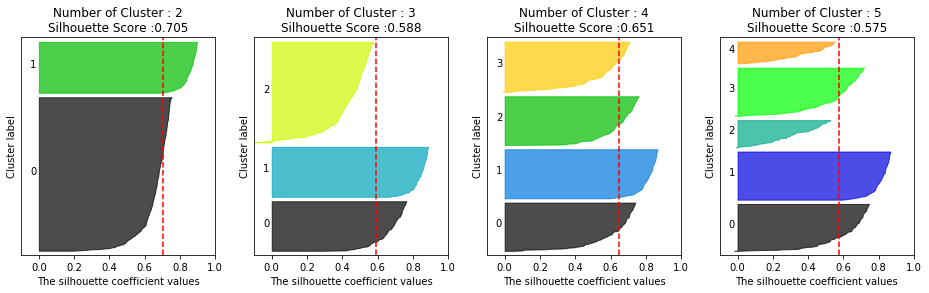

In [21]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
# 앞의 사이킷런 홈페이지에서 소개된 예와 비슷하게 make_blobs() 함수를 통해 4개 군집 중심의 500개의 2차원 데이터 세트를 만들고
# 이를 K-평균으로 군집화할 때 2개, 3개, 4개, 5개 중 최적의 군집 개수를 시각화
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
# 앞에서 소개한 바와 마찬가지로 4개의 군집일 때 가장 최적이 됨을 알 수 있다.
visualize_silhouette([ 2, 3, 4, 5], X)

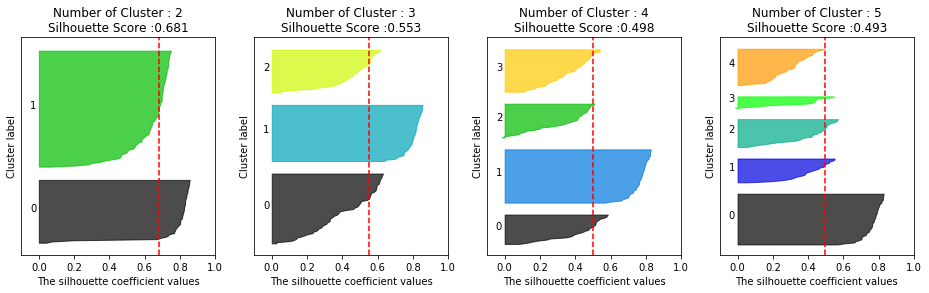

In [22]:
# 이번에는 붓꽃 데이터를 이용해 K-평균 수행 시 최적의 군집 개수를 알아본다.
from sklearn.datasets import load_iris

# 붓꽃 데이터를 K-평균으로 군집화할 경우에는 군집 개수를 2개로 하는 것이 가장 좋아보인다.
# 3개의 경우 평균 실루엣 계수 값도 2보다 작을 뿐더러 1번 군집과 다른 0번, 2번 군집과의 실루엣 계수의 편차가 크다. (4,5인 경우도 마찬가지)
iris = load_iris()
visualize_silhouette([2,3,4,5],iris.data)

**실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어난다. 특히 몇 만 건 이상의 데이터에 대해 사이킷런의 실루엣 계수 평가 API를 개인용 PC에서 수행할 경우 메모리 부족 등의 에러가 발생하기 쉽다.**

**이 경우 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고민해야 한다.**

## **03 평균 이동**

### **평균 이동(Mean Shift)의 개요**

**평균 이동(Mean Shift)은 K-평균과 유사하게 중심을 군집의 중심으로 지속적을 움직이면서 군집화를 수행한다.**

> **하지만 K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킨다.**

![test](./img/평균이동1.jpg)

**다음 그림에서 볼 수 있듯이 평균 이동 알고리즘은 특정 대역폭(bandwidth)을 가지고 최초의 확률 밀도 중심 c1_0내에서 데이터의 확률 밀도 중심이 더 높은 c1_r로 중심을 이동한다.**

**평균 이동은 데이터의 분포도를 이용해 군집 중심점을 찾는다. 군집 중심점은 데이터 포인트가 모여 있는 곳이라는 생각에서 착안한 것이며 이를 위해 확률 밀도 함수(probability density function)를 이용한다. 즉, 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정한다.**

**일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KED(Kernel Density Estimation)를 이용한다. 평균 이동 알고리즘은 임의의 포인트에서 시작한 이러한 피크 포인트를 찾을 때까지 KDE를 반복적으로 적용하며 군집화를 수행한다.**

![test](./img/평균이동2.png)

> **1. 초기 군집 중심점과 대역폭 설정**

> **2. 대역폭 내에 데이터 밀도가 높은 곳으로 중심점 이동**

> **3. 이동한 중심점에서 대역폭 내의 데이터 밀도 측정**

> **4. 대역폭 내의 데이터 밀도가 높은 곳으로 중심점 이동**

> **5. 위의 과정을 지속적으로 반복하여 가장 데이터 밀도가 높은 Peak 지점을 기준으로 군집화 수행**

> **6. Peak 지점을 찾으면 수행 중지**

**평균 이동은 K-평균과 다르게 군집의 개수를 지정할 필요가 없다. 대역폭의 크기에 따라 알고리즘 자체에서 군집의 개수를 최적으로 정한다.**

> **하지만 이 때문에 대역폭 크기를 어떤 값으로 설정하는가에 따라 군집화의 품질이 결정된다.**

In [70]:
# 사이킷런은 평균 이동 군집화를 위해 MeanShift 클래스를 제공한다.
# 다음 예제는 make_blobs()의 cluster_std를 0.8로 정한 3개의 군집의 데이터에 대해 bandwidth를 0.9로 설정한 평균 이동 알고리즘을 적용
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

meanshift = MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6 7]


**군집이 0부터 7까지 무려 8개로 분류됐다. 지나치게 세분화돼 군집화됐다. 일반적으로 bandwidth 값을 작게 할수록 군집 개수가 많아진다. 이번에는 bandwidth를 살짝 높인 1.0으로 해서 MeanShift를 수행해본다.**

In [71]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


**3개의 군집으로 잘 군집화됐다. 데이터의 분포 유형에 따라 bandwidth 값의 변환느 군집화 개수에 큰 영향을 미칠 수 있다. 따라서 MeanShift에서는 이 bandwidth 값을 찾기 위해서 estimate_bandwidth()를 제공한다.**

> **estimate_bandwidth()의 파라미터로 피처 데이터 세트를 입력하면 최적화된 bandwidth 값을 반환해준다.**

![test](./img/평균이동3.png)

In [72]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.2)
print('bandwidth 값:',round(bandwidth,3))

bandwidth 값: 1.444


In [73]:
# estimate_bandwidth()로 측정된 bandwidth를 평균 이동 입력 값으로 적용해 동일한 make_blobs() 데이터 세트에 군집화를 수행
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile=0.2)
print('best_bandwidth:',round(bandwidth,3))

# 3개의 군집으로 구성됨을 알 수 있다.
meanshift = MeanShift(bandwidth=1.444)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

best_bandwidth: 1.444
cluster labels 유형: [0 1 2 3]


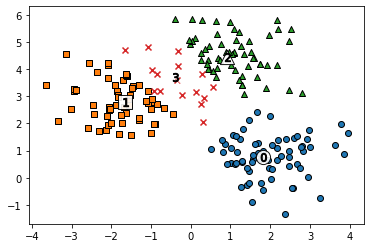

In [74]:
# 구성된 3개의 군집으 시각화해본다.
# 평균 이동도 K-평균과 유사하게 중심을 가지고 있으므로 cluster_centers_ 속성으로 군집 중심 좌표를 표시할 수 있다.
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels # 군집된 값들을 데이터 프레임에 meanshift_label 칼럼으로 추가
centers = meanshift.cluster_centers_ # 클러스터의 중심 좌표들을 centers에 할당
unique_labels = np.unique(cluster_labels) # 클러스터의 유일 값들을 unique_labels에 할당
markers = ['o','s','^','x','*'] # 평면상에 표현할 marker 설정

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label] # 매 epoche 마다 각 군집들을 데이터 정보를 label_cluster에 할당
    center_x_y = centers[label] # 각 군집의 중심점을 center_x_y에 할당
    
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],edgecolors='k', marker=markers[label])
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',
               edgecolors='k',alpha=0.9,marker=markers[label])
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',
               edgecolors='k',marker='$%d$' % label)
plt.show()

In [75]:
# target 값과 군집 label 값을 비교해본다. Target 값과 군집 label 값이 대부분 1:1로 잘 매칭되었다.
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       2                  59
        3                   8
1       0                  67
2       1                  58
        3                   8
Name: meanshift_label, dtype: int64


**평균 이동의 장점은 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않았기 때문에 좀 더 유연한 군집화가 가능하다는 점이다. 또한 이상치의 영향력도 크지 않으며, 미리 군집의 개수를 정할 필요도 없다. 하지만 알고리즘의 수행 시간이 오래 걸리며 무엇보다도 bandwidth의 크기에 따른 군집화 영향도가 매우 크다.**

**이 같은 특징 때문에 일반적으로 평균 이동 군집화 기법은 업무 기반의 데이터 세트보다는 컴퓨터 비전 영역에서 잘 사용된다. 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추정하는데 뛰어난 역할을 수행하는 알고리즘이다.**

## **04 GMM(Gaussian Mixture Model)**

### **GMM(Gaussian Mixture Model)소개**

**GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(GaussianDistribution)를 모델을 섞어서 생성된 모델로 가정해 수행하는 방식이다. 정규 분포(Normal distribution)로도 알려진 가우시안 분포는 좌우 대칭형의 종(Bell) 형태를 가진 통계학에서 가장 잘 알려진 연속 확률 함수이다.**

![test](./img/GMM1.jpg)

**정규 분포는 평균 m을 중심으로 높은 데이터 분포도를 가지고 있으며, 좌우 표준편차 1에 전체 데이터의 68.27%, 좌우 표준편차 2에 전체 데이터의 95.45%를 가지고 있다. 평균이 0이고, 표준편차가 1인 정규 분포를 표준 정규 분포라고 한다.**

**GMM(Gaussian Mixture Model)은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주한다. 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출한다. 먼저 다음과 같이 세 개의 가우시안 분포 A,B,C를 가진 데이터 세트가 있다고 가정한다.**

![test](./img/GMM4.png)

**이 세 개의 정규 분포를 합치면 다음 형태가 될 것이다.**

![test](./img/GMM3.jpg)

**군집화를 수행하려는 실제 데이터 세트의 데이터 분포도가 다음과 같다면 쉽게 이 데이터 세트가 정규분포 A,B,C가 합쳐서 된 데이터 분포도임을 알 수 있다.(A+B+C)**

![test](./img/GMM2.png)

**전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM 군집화 방식이다. 가령 1000개의 데이터 세트가 있다면 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식이다.**

**이와 같은 방식은 GMM에서는 모수 추정이라고 하는데, 모수 추정은 대표적으로 2가지를 추정하는 것이다.**

> **개별 정규 분포의 평균과 분산**

> **각 데이터가 어떤 정규 분포에 해당되는지의 확률**

**이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용한다. EM 알고리즘에 대한 설명은 더 많은 수학식이 필요하므로 이 책에서는 생략한다. 사이킷런은 이러한 GMM의 EM 방식을 통한 모수 추정 군집화를 지원하기 위해 GaussianMixture 클래스를 지원한다.**

### **GMM을 이용한 붓꽃 데이터 세트 군집화**

**GMM은 확률 기반 군집화이고 K-평균은 거리 기반 군집화이다. 이번에는 붓꽃 데이터 세트로 이 두가지 방식을 이용해 군집화를 수행한 뒤 양쪽 방식을 비교해본다.**

In [29]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris() # 데이터 불러오기
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame을 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
iris['target'] = iris.target

**GaussianMixture 객체의 가장 중요한 초기화 파라미터는 n_components이다. n_components는 gaussian mixture의 모델의 총 개수이다. K-평균의 n_clusters와 같이 군집의 개수를 정하는 데 중요한 역할을 수행.**

In [30]:
# n_components를 3으로 설정하고 GaussianMixture로 군집화를 수행한다.
# GaussianMixture 클래스는 sklearn.mixture 패키지에 위치해 있음에 유의
# GaussianMixture 객체의 fit(피처 데이터 세트)와 predict(피처 데이터 세트)를 수행해 군집을 결정한 뒤 
# irisDF DataFrame에 'gmm_cluster'칼럼 명으로 저장하고 나서 타깃별로 군집이 어떻게 매핑됐는지 확인
from sklearn.mixture import GaussianMixture

# n_components는 k-평균의 n_clusters와 같이 군집의 개수를 지정
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
iris_result

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64

**Target 0은 cluster 0으로, Target 2는 cluster 1로 모두 잘 매핑됐다. Target 1만 cluster 2로 45개(90%), cluster 1로 5개(10%) 매핑됐다. 앞 절의 붓꽃 데이터 세트의 K-평균 군집화를 수행한 결과보다 더 효과적인 분류 결과가 도출됐다. 붓꽃 데이터 세트의 K-평균 군집화를 수행한 결과를 본다.**

In [31]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
iris_result

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64

**이는 어떤 알고리즘에 더 뛰어나다는 의미가 아니라 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이라는 의미이다.**

**K-평균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하는 방식이므로 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화가 수행될 수 있다.**

### **GMM과 K-평균의 비교**

**KMeans는 원형 범위에서 군집화를 수행한다. 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아진다.**

In [32]:
# 다음은 make_blobs()의 군집의 수를 3개로 하되, cluster_std를 0.5로 설정해 군집 내의 데이터를 뭉치게 유도한 데이터 세트에 KMeans를 적용
# 이렇게 cluster_std를 작게 설정하면 데이터가 원형 형태로 분산될 수 있다.
# 결과를 보면 KMeans로 효과적으로 군집화된 것을 알 수 있다.
X,y = make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.5,random_state=0)
print(X.shape,y.shape)

(200, 2) (200,)


In [33]:
unique, counts = np.unique(y, return_counts=True) # np.unique(y 레이블 값의 유일 값들을 unique에 각각의 유일 값들의 갯수(return_counts=Ture)를 counts에 할당한다.)
print(unique, counts)

[0 1 2] [67 67 66]


In [34]:
# 좀 더 데이터 가공을 편리하게 하기 위해서 위 데이터 세트를 DataFrame으로 변경한다. 피처의 이름은 ftr1, ftr2이다.

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.630356,3.357972,2
1,0.802314,4.381962,0
2,1.053744,4.492869,0


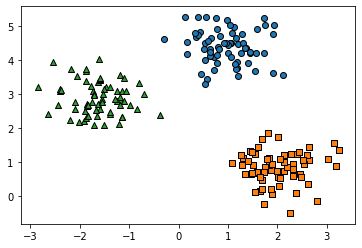

In [35]:
# 이제 make_blob()으로 만든 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인한다.
# 타깃값 0,1,2에 따라 마커를 다르게 해서 산점도를 그려보면 
# 다음과 같이 3개의 구분될 수 있는 군집영역(make_blobs()이 y 반환 값)으로 피처 데이터 세트가 만들어졌음을 알 수 있다.
target_list = np.unique(y) # 0,1,2 (3개의 군집 영역으로 구분)
# 각 타깃별 산점도의 마커 값.
markers = ['o','s','^','P','D','H','x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target == 0, target == 1, target ==2로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target] # 각 epoche 마다 target(0,1,2)일 때의 레코드를 target_cluster에 할당
    plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolors='k',marker=markers[target]) # feature 2개를 x축, y축으로 하여 산점도를 그린다.
plt.show()

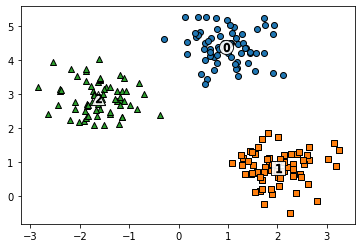

In [36]:
# 이번에는 이렇게 만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤에 군집별로 시각화해 본다.
# 먼저 KMeans 객체에 fit_predict(X)를 수행해 make_blobs()의 피처 데이터 세트인 X 데이터를 군집화한다.
# 이를 앞에서 구한 clusterDF DataFrame의 'kmeans_label'칼럼으로 저장한다.
# 그리고 KMeans 객체의 cluster_centers_ 속성은 개별 군집의 중심 위치 좌표를 나타내기 위해 사용한다.

# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=200,random_state=0) # 군집 수: 3, 반복수: 200, 계산방식:k-means
cluster_labels = kmeans.fit_predict(X) # X 데이터에 군집화한 결과를 cluster_labels에 할당
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_ # 중심 위치 좌표 추출
unique_labels = np.unique(cluster_labels) # 군집화 결과 레이블(cluster_labels)의 유일 값을 추출하여 unique_labels에 할당
markers=['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label] # 각 epoche 마다 target(0,1,2)일 때의 레코드를 label_cluster에 할당
    center_x_y = centers[label] # 각 레이블(0,1,2)의 중심위치 좌표를 할당
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolors='k',marker=markers[label]) # x축, y축을 2개의 feature로 label 위치들을 산점도로 표현
    
    # 군집별 중심 위치 좌표 시각화
    # make_blobs()의 타깃과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있다.(그래서 산점도의 마커가 서로 다를 수 있다.)
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', 
               alpha=0.9,edgecolors='k',marker = markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
               edgecolors='k',marker='$%d$'%label)
plt.show()

In [37]:
# 결과를 보면 KMeans로 효과적으로 군집화된 것을 알 수 있다.
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               67
1       1               67
2       2               66
Name: kmeans_label, dtype: int64


**하지만 데이터가 원형의 범위로 퍼져 있지 않는 경우에는 어떨까? KMeans는 대표적으로 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못한다. 다음에서 해당 데이터 세트를 make_blobs()의 데이터를 변환해 만들어본다. 앞으로도 군집을 자주 시각화하므로 이를 위한 별도의 함수를 만들어 이용한다.**

**함수명은 viualize_cluster_plot(clusterobj, dataframe, label_name, iscluster=True)이다.**

> **clusterobj: 사이킷런의 군집 수행 객체. KMeans나 GaussisanMixture의 fit()와 predict() 군집화를 완료한 객체, 만약 군집화 결과 시각화가 아니고 make_blobs()로 생성한 데이터의 시각화일 경우 None 입력**

> **dataframe: 피처 데이터 세트와 label 값을 가진 DataFrame**

> **label_name: 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼 명, make_blobs() 결과 시각화일 경우는 dataframe 내의 target 칼럼 명**

> **iscenter: 사이킷런 Cluster객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False**

In [38]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_ # 객체로 들어오는 군집 알고리즘의 군집 중심점을 저장
        
    unique_labels = np.unique(dataframe[label_name].values) # 레이블의 unique 레이블을 unique_labels에 할당
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label] # 각 해당 레이블에 대한 정보들을 label_cluster에 할당
        if label == -1: # 만약 label == -1이라면
            cluster_legend = 'Noise' # cluster_legend에 Noise를 할당하고
            isNoise=True # isNoise는 True로 변경
        else : # label이 -1이 아니면
            cluster_legend = 'Cluster '+str(label) # cluster + (각각의 군집 번호)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend) # 각각의 군집 번호에 따른 scatter plot을 실행
        
        if iscenter: # 군집 중심점 값이 들어오면
            center_x_y = centers[label] # 각각의 해당 레이블에 대한 군집 중심점 좌표를 할당하고,
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white', # x축(x좌표), y축(y좌표)를 시각화한다.
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise: # 만약 isNoise가 True이면
        legend_loc='upper center'  # upper center자리에 표시
    else: legend_loc='upper right' # 아니면 upper right자리에 표시
    
    plt.legend(loc=legend_loc)
    plt.show()

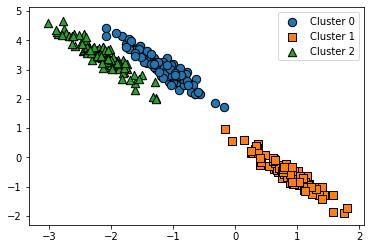

In [39]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X, y = make_blobs(n_samples=300,n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환
transformation = [[0.60834549,-0.63667341],[-0.40887718,0.85253229]]
X_aniso = np.dot(X,transformation)
# feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target'] = y
# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

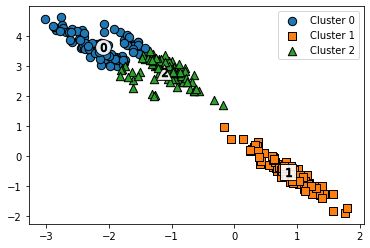

In [40]:
# 위와 같이 만들어진 데이터 세트에서는 KMeans의 군집화 정확성이 떨어진다.
# KMeans가 위 데이터 세트를 어떻게 군집화하는지 확인 해본다.

# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

# fit_predict를 완료한 객체: kmeans, label을 포함한 데이터 프레임: clusterDF, target명: 'kmeans_label', 군집좌표제공: iscenter=True 
visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=True)

**KMeans로 군집화를 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음을 알 수 있다.**

**KMeans가 평균 거리 기반으로 군집화를 수행하므로 같은 거리상 원형으로 군집을 구성하면서 위와 같이 길쭉한 방향으로 데이터가 밀접해 있을 경우에는 최적의 군집화가 어렵다.**

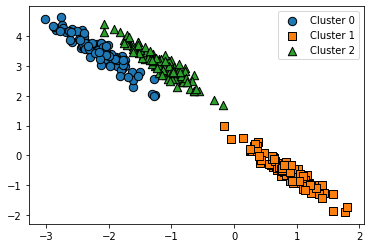

In [41]:
# 이번에는 GMM으로 군집화를 수행한다.
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscluster를 False로 설정
visualize_cluster_plot(gmm,clusterDF,'gmm_label',iscenter=False)

**데이터가 분포된 방향에 따라 정확하게 군집화됐음을 알 수 있다. GMM은 K-평균과 다르게 군집의 중심 좌표를 구할 수 없기 때문에 군집 중심 표현이 visualize_cluster_plot()에서 시각화되지 않는다. make_blobs()의 target값과 KMeans, GMM의 군집 Label값을 서로 비교해 위와 같은 데이터 세트에서 얼만큼의 군집화 효율 차이가 발생하는지 확인해본다.**

In [42]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


**KMeans의 경우 군집 1번만 정확히 매핑됐지만, 나머지 군집의 경우 target 값과 어긋나는 경우가 발생하고 있다. 하지만 GMM의 경우는 군집이 target값과 잘 매핑돼 있다.**

**이처럼 GMM의 경우는 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있다. 하지만 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있다.**

## **05 DBSCAN**

### **DBSCAN**

**다음으로 밀도 기반 군집화의 대표적인 알고리즘인 DBSCAN(Density Based Spatial Clustering of Applications with Noise)에 대해 알아본다.**

**DBSCAN은 간단하고 직관적인 알고리즘으로 돼 있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능하다.**

> **다음과 같이 내부의 원 모양과 외부의 원 모양 형태의 분포를 가진 데이터 세트를 군집화한다고 가정할 대 앞에서 소개한 K 평균, 평균 이동, GMM으로는 효과적인 군집화를 수행하기가 어렵다.**

**DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행한다.**

![test](./img/DBSCAN1.png)

**DBSCAN을 구성하는 가장 중요한 두 가지 파라미터는 입실론(epsilon)으로 표기하는 주변 영역과 입실론 주변 영역에 포함되는 최소 데이터의 개수 min points이다.**

> **입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역이다.**

> **최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수이다.**

**입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의한다.**

> **핵심 포인트(Core point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고 한다.**

> **이웃 포인트(Neighbor Point): 주변 영역 내에 위치한 타 데이터를 이웃 포인트라 한다.**

> **경계 포인트(Border Point): 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라 한다.**

> **잡음 포인트(Noise Point): 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라 한다.**

![test](./img/DB1.PNG)

> **1. 위 그림과 같이 P1에서 P12까지 12개의 데이터 세트에 대해서 DBSCAN 군집화를 적용하면서 주요 개념을 설명한다. 특정 입실론 반경 내에 포함될 최소 데이터 세트를 6개로(자기 자신의 데이터를 포함) 가정한다.**

![test](./img/DB2.PNG)

> **2. P1 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 7개(자신은 P1, 이웃 데이터 P2,P6,P7,P8,P9,P11)로 최소 데이터 5개 이상을 만족하므로 P1 데이터는 핵심 포인트(Core Point)이다.**

![test](./img/DB3.PNG)

> **3. 다음으로 P2 데이터 포인트를 살펴본다. P2 역시 반경 내에 6개의 데이터(자신은 P2, 이웃 데이터 P1,P3,P4,P9,P10)을 가지고 있으므로 핵심 포인트이다.**

![test](./img/DB4.PNG)

> **4. 핵심 포인트 P1의 이웃 데이터 포인트 P2 역시 핵심 포인트일 경우 P1에서 P2로 연결해 직접 접근이 가능하다.**

![test](./img/DB5.PNG)

> **5. 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심포인트를 서로 연결하면서 군집화를 구성한다. 이러한 방식으로 점차적으로 군집(Cluster)영역을 확장해 나가는 것이 DBSCAN 군집화 방식이다.**

![test](./img/DB6.PNG)

> **6. P3 데이터의 경우 반경 내에 포함되는 이웃 데이터는 P2,P4로 2개이므로 군집으로 구분할 수 있는 핵심 포인트가 될 수 없다. 하지만 이웃 데이터 중에 핵심 포인트인 P2를 가지고 있다. 이처럼 자신은 핵심 포인트가 아니지만, 이웃 데이터로 핵심 포인트를 가지고 있는 데이터를 경계 포인트(Boder Point)라고 한다. 경계 포인트는 군집의 외곽을 형성한다.**

![test](./img/DB7.PNG)

> **7. 다음 그림의 P5와 같이 반경 내에 최소 데이터를 가지고 있지도 않고, 핵심 포인트 또한 이웃 데이터로 가지고 있지 않는 데이터를 잡음 포인트(Noise Point)라고 한다.**

**DBSCAN은 이처럼 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식이다.**

**사이킷런은 DBSCAN 클래스를 통해 DBSCAN 알고리즘을 지원한다. DBSCAN 클래스는 다음과 같은 주요한 초기화 파라미터를 가지고 있다.**

> **eps: 입실론 주변 영역의 반경을 의미한다.**

> **min_samples: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미한다. (자신의 데이터를 포함한다. 위에서 설명한 min points + 1)**

### **DBSCAN 적용하기 - 붓꽃 데이터 세트**

**DBSCAN 알고리즘으로 붓꽃 데이터 세트를 군집화한다. 앞 절의 GMM을 이용한 붓꽃 데이터 세트 군집화의 예제와 동일하므로 코드작성은 생략한다.**

In [43]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris() # 데이터 불러오기
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame을 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
iris['target'] = iris.target

In [44]:
# 다음으로 DBSCAN 클래스를 이용해 붓꽃 데이터 세트를 군집화한다.
from sklearn.cluster import DBSCAN

# eps=0.6, min_samples=8로한다. 일반적으로 eps 값으로는 1 이하의 값을 설정한다.
dbscan = DBSCAN(eps=0.6,min_samples=8,metric='euclidean')

# 군집화된 결과를 dbscan_labels에 할당한다.
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


**먼저 dbscan_cluster 값을 살펴본다. 0과 1외에 특이하게 -1이 군집 레이블로 있는 것을 알 수 있다. 군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미한다.**

> **따라서 위 붓꽃 데이터 세트는 DBSCAN에서 0과 1에 두 개의 군집으로 군집화됐다.**

> **Target 값의 유형이 3가지인데, 군집이 2개가 됐다고 군집화 효율이 떨어진다는 의미는 아니다.**

**DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미하다고 할 수 있다.**

> **특히 붓꽃 데이터 세트는 군집을 3개로 하는 것보다는 2개로 하는 것이 군집화의 효율로서 더 좋은 면이 있다.**

**DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환한 뒤, 앞 예제에서 사용한 visualize_cluster_plot() 함수를 이용해 시각화한다.**

> **visualize_cluster_2d() 함수 인자로 사용하기 위해 irisDF의 'ftr1','ftr2' 칼럼에 PCA로 변환된 피처 데이터 세트를 입력한다.**

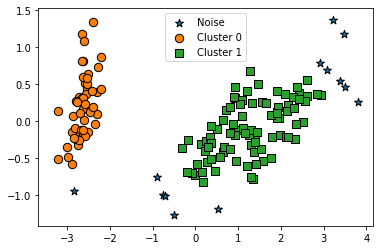

In [45]:
from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visual_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0] # 첫 번째 컴포넌트
irisDF['ftr2'] = pca_transformed[:,1] # 두 번째 컴포넌트

visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

**별표로 표현된 값은 모두 노이즈이다. PCA로 2차원으로 표현하면 이상치인 노이즈 데이터가 명확히 드러난다. DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋다.**

**DBSCAN 알고리즘에 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 게 중요하다.**

> **일반적으로 eps 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아진다.**

> **min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 된다.**

> **데이터 밀도가 더 커져야 하는데, 매우 촘촘한 데이터 분포가 아닌 경우 노이즈로 인식하기 때문**

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


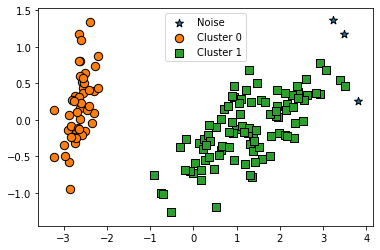

In [46]:
# eps를 기존 0.6에서 0.8로 증가시키면 노이즈 데이터 수가 줄어든다.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

**노이즈 군집인 -1인 3개밖에 없다. 기존 eps가 0.6일 때 노이즈로 분류된 데이터 세트는 eps 반경이 커지면서 Cluster 1에 소속 됐다.**

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


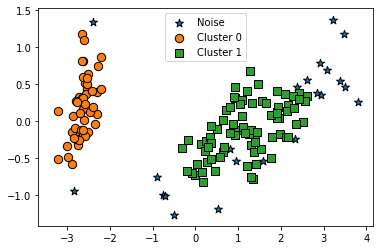

In [47]:
# 이번에는 eps를 기존 0.6으로 유지하고 min_samples를 16으로 늘려본다.
# 바로 위 예제 코드에서 DBSCAN의 초기화 파라미터 값만 다음과 같이 변경하면 된다.
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

# 노이즈 데이터가 기존보다 많이 증가함을 알 수 있다.
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### **DBSCAN 적용하기 - make_circles( ) 데이터 세트**

**이번에는 복잡한 기하학전 분포를 가지는 데이터세트에서 DBSCAN과 타 알고리즘을 비교해본다.**

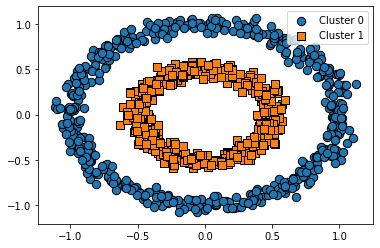

In [48]:
# 먼저 make_circles() 함수를 이용해 내부 원과 외부 원 형태로 돼 있는 2차원 데이터 세트를 만들어본다.
# make_circles() 함수는 오직 2개의 피처만을 생성하므로 별도의 피처 개수를 지정할 필요가 없다.
# 파라미터 noise는 노이즈 데이터 세트의 비율이며, factor는 외부 원과 내부 원의 scale 비율이다.

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,shuffle=True,noise=0.05,random_state=0,factor=0.5)
clusterDF = pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

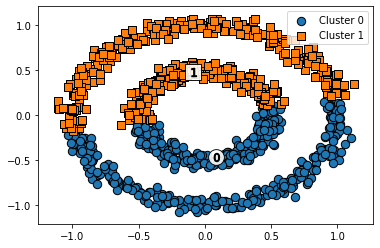

In [49]:
# make_circles()는 내부 원과 외부 원으로 구분되는 데이터 세트를 생성함을 알 수 있다.
# DBSCAN이 이 데이터 세트를 군집화한 결과를 보기 전에 먼저 K-평균과 GMM은 어떻게 이 데이터 세트를 군집화하는지 확인해 본다.
# 먼저 K-평균으로 make_circles() 데이터 세트를 군집화해본다.

# kmeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

# 위, 아래 군집 중심을 기반으로 위와 아래 절반으로 군집화됐다.
# 거리 기반 군집화로는 위와 같이 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어렵다.
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

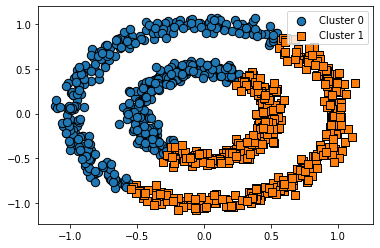

In [50]:
# 다음으로는 GMM을 적용해본다.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

# GMM도 앞 절의 일렬로 늘어선 데이터 세트에서는 효과적으로 군집화 적용이 가능했으나,
# 내부와 외부의 원형으로 구성된 더 복잡한 형태의 데이터 세트에서는 군집화가 원하는 방향으로 되지 않았다.
visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

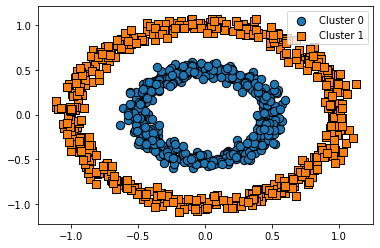

In [51]:
# 이제 DBSCAN으로 군집화를 적용해본다.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

# DBSCAN으로 군집화를 적용해 원하는 방향으로 정확히 군집화가 됐음을 알 수 있다.
visualize_cluster_plot(dbscan,clusterDF,'dbscan_cluster',iscenter=False)

## **06 군집화 실습 - 고객 세그먼테이션**

### **고객 세그먼테이션의 정의와 기법**

**고객 세그먼테이션(Customer Segmentation)은 다양한 기준으로 고객을 분류하는 기법을 지칭한다. 고객 세그먼테이션은 CRM이나 마케팅의 중요 기반 요소이다.**

![test](./img/세그먼테이션.jpg)

**고객을 분류하는 요소는 여러 가지가 있다. 지역/결혼 여부/성별/소득과 같이 개인의 신상 데이터가 이를 위해 사용될 수도 있습니다만, 고객 분류가 사용되는 대부분의 비즈니스가 상품 판매가 중점을 두고 있기 때문에 더 중요한 분류 요소는 어떤 상품을 얼마나 많은 비용을 써서 얼마나 자주 사용하는가에 기반한 정보로 분류하는 것이 보통이다.**

> **기업 입장에서는 얼마나 많은 매출을 발생하느냐가 고객 기준을 정하는 중요한 요소이다.**

**고객 세그먼테이션의 주요 목표는 타깃 마케팅이다.**

> **타깃 마케팅이란 고객을 여러 특성에 맞게 세분화해서 그 유형에 따라 맞춤형 마케팅이나 서비스를 제공하는 것이다. 평소에 많은 돈을 지불해 서비스를 이용하고 있다면 VIP 전용 삼품의 가입을 권유하는 전화나 이메일을 많이 받아봤을 것이다. 새로운 상품이나 서비스를 적극적으로 이용해왔다면 프로모션 상품이 출시될 때마다 권유를 받았을 것이다. 이처럼 기업의 마케팅은 고객의 상품 구매 이력에서 출발한다.**

**고객 세그먼테이션은 고객의 어떤 요소를 기반으로 군집화할 것인가를 결정하는 것이 중요한데, 여기서는 기본적인 고객 분석 요소인 RFM 기법을 이용한다.**

> **RFM 기법은 Recency(R), Frequency(F), Monetary Value(M)의 각 앞글자를 합한 것으로서 각 단어의 의미는 다음과 같다.**

> **RECENCY(R): 가장 최근 상품 구입 일에서 오늘까지의 기간**

> **FREQUECNCY(F): 상품 구매 횟수**

> **MONENTARY VALUE(M): 총 구매 금액**

### **데이터 세트 로딩과 데이터 클렌징**

In [52]:
# 엑셀 파일을 판다스의 read_excel() 함수를 이용해 DataFrame으로 로드해본다.
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


**이 데이터 세트는 제품 주문 데이터 세트이다. Invoice(주문번호) + StockCode(제품코드)를 기반으로 주문량, 주문 일자, 제품 단가, 주문 고객 번호, 주문 고객 국가 등의 칼럼으로 구성돼 있다. 데이터 세트의 각 칼럼은 다음과 같다.**

> **InvoiceNo: 주문번호. 'C'로 시작하는 것은 취소 주문이다.**

> **StockCode: 제품 코드(item Code)**

> **Description: 제품 설명**

> **Quantity: 주문 제품 건수**

> **InvoiceDate: 주문 일자**

> **UnitPrice: 제품 단가**

> **CustomerID: 고객 번호**

> **Country: 국가명(주문 고객의 국적)**

In [53]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**전체 데이터는 541,909개이다. 하지만 CustomerID의 NULL 값이 너무 많다. CustomerID가 Not Null인 데이터 건수는 406,829개로 무려 13,500건의 데이터가 Null이다. 그 외 다른 칼럼의 경우도 오류 데이터가 존재한다. 따라서 이 데이터 세트는 먼저 사전 정제 작업이 필요하다.**

> **Null 데이터 제거: 특히 CustomerID가 Null인 데이터가 많다. 고객 세그먼테이션을 수행하므로 고객 식별 번호가 없는 데이터는 필요가 없기에 삭제한다.**

> **오류 데이터 삭제: 대표적인 오류 데이터는 Quantity 또는 UnitPrice가 0보다 작은 경우이다. 사실 Quantity가 0보다 작은 경우는 오류 데이터라기보다는 반환을 뜻하는 값이다. 이 경우 InvoiceNo의 앞자리는 'C'로 돼 있다. 분석의 효율성을 위해서 이 데이터는 모두 삭제한다.**

In [54]:
# 불린 인덱싱을 적용해 Quantity > 0 , UnitPrice > 0 이고 CustomerID이 Not Null인 값만 다시 필터링한다.
retail_df = retail_df[(retail_df['Quantity'] > 0) & (retail_df['UnitPrice'] > 0 ) & (retail_df['CustomerID'].notnull())]
print(retail_df.shape)
# 전체 데이터가 541,909에서 397,884로 줄었다. 이제 Null 값은 칼럼에 존재하지 않는다.
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [55]:
# 한 가지 사항만 더 정리하고 간략하게 데이터 사전 정제를 마친다.
# Country 칼럼은 주문 고객 국가이다. 주요 주문 고객은 영국인데, 이 외에도 EU의 여러 나라와 영연방 국가들이 포함돼 있다.
retail_df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [56]:
# 영국이 대다수를 차지하므로 다른 국가의 데이터는 모두 제외한다.
retail_df = retail_df[retail_df['Country'] == 'United Kingdom']
print(retail_df.shape) # 최종 데이터는 354,321건으로 줄었다.

(354321, 8)


### **RFM 기반 데이터 가공**

**이제 사전 정제된 데이터 기반으로 고객 세그먼테이션 군집화를 RFM 기반으로 수행한다. 이를 위해 필요한 데이터를 가공한다. 먼저 'UnitPrice'와 'Quantity'를 곱해서 주문 금액 데이터를 만든다. 그리고 CustomerNo도 편리한 식별성을 위해 float 형을 int 형으로 변경한다.**

In [57]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [58]:
# 해당 온라인 판매 데이터 세트는 주문 횟수와 주문 금액이 압도적으로 특정 고객에게 많은 특성을 가지고 있다.
# 개인 고객의 주문과 소매점의 주문이 함께 포함돼 있기 때문이다.
# Top-5 주문 건수와 주문 금액을 가진 고객 데이터를 추출해 본다.
print(retail_df['CustomerID'].value_counts().head(5)) # CustormerID(이용자) 이용자가 많은 Top5를 출력

# CustomerID(이용자)를 기준으로 판매 급액의 합계를 내림차순으로 정렬하고, 상위 5개의 CustomerID를 출력
# 아래 결과에서 볼 수 있듯이 몇몇 특정 고객이 많은 주문 건수와 주문 금액을 가지고 있다.
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5]) 

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [59]:
# 주어진 온라인 판매 데이터 세트는 전형적인 판매 데이터 세트와 같이 주문번호(InvoiceNo) + 상품코드(StockCode) 레벨의 식별자로 돼 있다.
# InvoiceNo + StockCode로 Group by를 수행하면 거의 1에 가깝게 유일한 식별자 레벨이 됨을 알 수 있다.
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

**그런데 지금 수행하려는 RFM 기반의 고객 세그먼테이션은 고객 레벨로 주문 기간, 주문 횟수, 주문 금액 데이터를 기반으로 해 세그먼테이션을 수행하는 것이다. 이에 주문번호 + 상품코드 기준의 데이터를 고객 기준의 Recency, Frequency, Monetary value 데이터로 변경한다. 이를 위해서 주문 번호 기준의 데이터를 개별 고객 기준의 데이터로 Group by를 해야한다.**

> **주문번호 기준의 retail_df DataFrame에 groupby('CustomerID')를 적용해 CustomerID 기준으로 DataFrame을 새롭게 생성한다.**

**DataFrame의 groupby()만 사용해서는 여러 개의 칼럼에 서로 다른 aggregation 연산, 예를 들어 count()나 max()를 한 번에 수행하기 어렵다.**

> **이를 해결하기 위해서 DataFrame에 groupby()를 호출해 반환된 DataFrameGroupby 객체에 agg()를 이용한다.**

> **agg()에 인자로 대상 칼럼들과 aggregation 함수명들을 딕셔너리 형태로 입력하면 칼럼 여러 개의 서로 다른 aggregation 연산을 쉽게 수행할 수 있다.**

**Frequency는 고객별 주문 건수 이므로 'CustomerID'로 groupby()해서 'InvoiceNo'의 count() aggregation으로 구한다.**

**Monetary value는 고객별 주문 금액이므로 'CustomerID'로 groupby()해서 'sale_amount'의 sum() aggregation으로 구한다.**

**Recency의 경우는 두 번의 가공 작업을 수행한다.**

> **'CustomerID'로 groupby()해서 'InvoiceDate'칼럼의 max()로 고객별 가장 최근 주문 일자를 먼저 구한 뒤 추후에 가공 작업을 별도로 수행한다.**

In [60]:
# DataFrame의 groupby()의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 칼럼의 max()에서 데이터 가공
# Frequency는 InvoiceNo 칼럼의 count()
# Monetary value는 sale_amount 칼럼의 sum()
aggregations = {
    'InvoiceDate':'max',
    'InvoiceNo':'count',
    'sale_amount':'sum'
}

# 주문번호 + 상품번호 기준의 데이터를 고객 기준의 데이터로 변경
# 즉, 고객 기준으로 가장 최근에 구입한 날짜, 구입 횟수, 총 구매액을 데이터프레임으로 표현
cust_df = retail_df.groupby('CustomerID').agg(aggregations)

# groupby된 결과 칼럼 값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'})
# index 초기화
cust_df = cust_df.reset_index()
cust_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73
3,12749,2011-12-06 09:56:00,199,4090.88
4,12820,2011-12-06 15:12:00,59,942.34


In [61]:
# Recency 칼럼은 개별 고객당 가장 최근의 주문인데, 데이터 값의 특성으로 인해 아직 데이터 가공이 추가로 필요하다.
# Recency는 고객이 가장 최근에 주문한 날짜를 기반으로 하는데, 오늘 날짜를 기준으로 가장 최근 주문 일자를 뺀 날짜이다.
# 여기서 주의할 점은 오늘 날짜를 현재 날짜로 해서는 안 된다.
# 온라인 판매 데이터가 2010년 12월 1일에서 2011년 12월 9일까지 데이터이므로, 오늘 날짜는 2011년 12월 9일에서 하루 더한 2011년 12월 10일로 한다.
# 2011년 12월 10일을 현재 날짜로 간주하고 가장 최근의 주문 일자를 뺀 데이터에서 일자 데이터(days)만 추출해 생성한다.
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency'] # 2011.12.10 날짜에서 가장 최근 주문 일자를 뺀 날짜
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1) # 일자 데이터만 추출 (0부터 시작하기 떄문에 +1)
print('cust_df 로우와 칼럼 건수는',cust_df.shape)
cust_df.head(3)

# 아래 결과 처럼 고객별로 RFM 분석에 필요한 Recency, Frequency, Monetary 칼럼을 모두 생성했다.
# 다음으로는 생성된 고객 RFM 데이터 세트의 특성을 개괄적으로 알아보고 RFM 기반에서 고객 세그먼테이션을 수행한다.

cust_df 로우와 칼럼 건수는 (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


### **RFM 기반 고객 세그먼테이션**

**온라인 판매 데이터 세트는 소매업체의 대규모 주문을 포함하고 있다.**

> **이들은 주문 횟수와 주문 금액에서 개인 고객 주문과 매우 큰 차이를 나타내고 있으며 이로 인해 매우 왜곡된 데이터 분포도를 가지게 되어 군집화가 한쪽 군집에만 집중되는 현상이 발생하게 된다.**

**먼저 온라인 판매 데이터 세트의 칼럼별 히스토그램을 확인하고, 이처럼 왜곡된 데이터 분포도에서 군집화를 수행할 때 어떤 현상이 발생하는지 알아본다.**

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <a list of 10 Patch objects>)

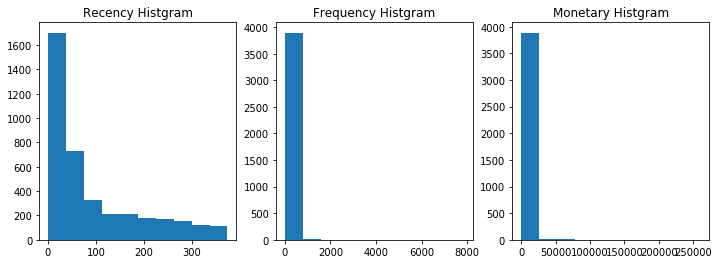

In [62]:
# 다음 예제 코드는 Recency, Frequency, Monetary 칼럼 값 분포 히스토그램을 나타낸다.
# 맷플롯림의 hist()를 이용해 각 칼럼의 값 분포도를 알아본다.
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4),nrows=1,ncols=3) # 1행 3열의 3개의 그래프 생성
ax1.set_title('Recency Histgram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histgram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histgram')
ax3.hist(cust_df['Monetary'])

**Recency, Frequency, Monetary 모두 왜곡된 데이터 값 분포도를 가지고 있으며, 특히 Frequency, Monetary의 경우 특정 범위에 값이 몰려 있어서 왜곡 정도가 매우 심함을 알 수 있다.**

In [63]:
# 각 칼럼의 데이터 값 백분위로 대략적으로 어떻게 값이 분포돼 있는지 확인해본다.
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


**Recency는 평균이 91.7이지만, 50%(중위값)인 50보다 크게 높다. 그리고 max값은 373으로 75%(3/4분위)인 142보다 훨씬 커서 왜곡 정도가 높음을 알 수 있다.**

**Frequency와 Monetary의 경우 왜곡 정도가 더 심해서 Frequency의 평균이 90.3인데, 75%인 99.25에 가깝다. 이는 max 값 7847을 포함한 상위 몇 개의 큰 값으로 인한 것이다.**

**Monetary 역시 마찬가지로, 평균은 1864.3으로 75%인 1578.5보다 매우 크다. 이는 max 값 259657.3을 포함한 상위 몇개의 큰 값으로 인해 발생한 현상이다.**

**왜곡 정도가 매우 높은 데이터 세트에 K-평균 군집을 적용하면 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행된다.**

In [64]:
# 먼저 데이터 세트를 StandardScaler로 평균과 표준편차를 재조정한 뒤에 K-평균을 수행해본다.

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.592


**군집을 3개로 구성할 경우 전체 군집의 평균 실루엣 계수인 실루엣 스코어는 0.592로 안정적인 수치가 나왔다. 하지만 각 군집별 실루엣 계수 값을 판단할 필요가 있다.**

In [65]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
# 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

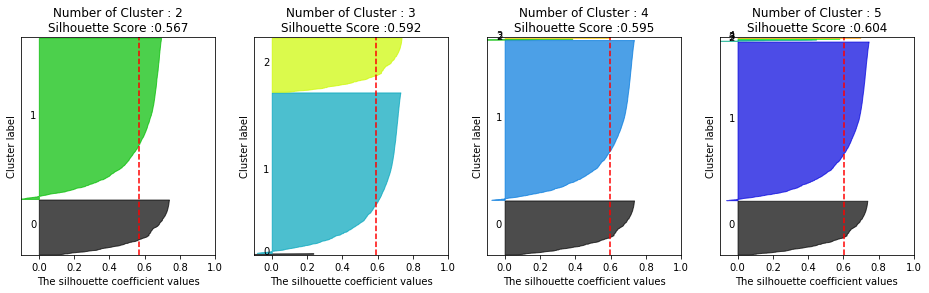

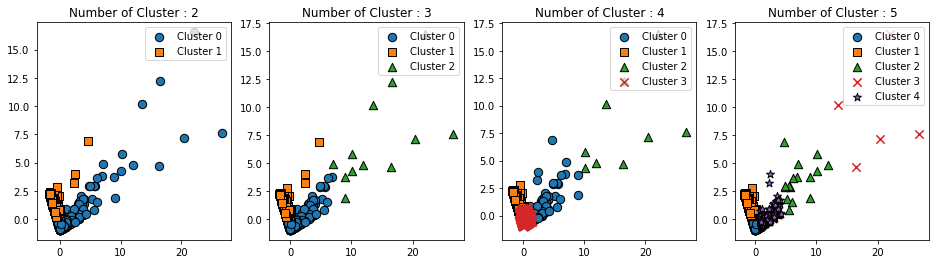

In [66]:
# 2절 군집평가 예제에서 사용한 visualized_silhouette() 함수와 군집 개수별로 군집화 구성을 시각화하는 visualize_kmeans_plot_multi() 함수를
# 생성하여 군집 개수를 2 ~ 5개까지 변화시키면서 개별 군집의 실루엣 계수 값과 데이터 구성을 함께 알아본다.
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

**군집이 2개일 경우 0번 군집과 1번 군집이 너무 개괄적으로 군집화됐다.**

> **군집 수를 증가시키면 개선이 가능할 것으로 예상됐는데, 실제로는 그렇지 않다.**

**군집이 3개 이상일 때부터는 데이터 세트의 개수가 너무 작은 군집이 만들어진다. 이 군집에 속한 데이터는 개수가 작을뿐더라 실루엣 계수 역시 상대적으로 매우 작다. 또한 군집 내부에서도 데이터가 광범위하게 퍼져있다.**

> **군집이 3개 일 때는 0번 군집의 데이터 건수가 매우 작고, 4개일 때는 (2번, 3번)군집이, 5개일 때는 (2,3,4)번 군집에 속한 데이터 세트의 개수가 너무 적고 광범위하게 퍼져있다.**

**이 소수의 데이터 세트는 바로 앞에서 왜곡된 데이터 값인 특정 소매점의 대량 주문 구매 데이터이다.**

> **이 데이터 세트의 경우 데이터 값이 거리 기반으로 광범위하게 퍼져 있어서 군집 수를 계속 늘려봐야 이 군집만 지속적으로 분리하게 되기에 의미 없는 군집화 결과로 이어지게 된다.**

**물론 이러한 특이한 데이터 세트를 분리하고 도출하는 것이 군집화의 목표이기도 한다. 하지만 이 정도로 크게 왜곡된 데이터 세트의 도출은 굳이 군집화를 이용하지 않고도 간단한 데이터 분석만으로도 충분히 가능하다.**

> **더구나 업무 로직을 알고 있는 분석가라면 이미 이 정도의 세그먼테이션 결과는 미리 알고 있었을 것이다. 이처럼 지나치게 왜곡된 데이터 세트는 K-평균과 같은 거리 기반 군집화 알고리즘에서 지나치게 일반적인 군집화 결과를 도축하게 된다.**

**비지도학습 알고리즘의 하나인 군집화의 기능적 의미는 숨어 있는 새로운 집단을 발견하는 것이다. 새로운 군집 내의 데이터 값을 분석하고 이해함으로써 이 집단에 새로운 의미를 부여할 수 있다. 이를 통해 전체 데이터를 다른 각도로 바라볼 수 있게 만들어 준다.**

**데이터 세트의 왜곡 정도를 낮추기 위해 가장 자주 사용되는 방법은 데이터 값에 로그(Log)를 적용하는 로그 변환이다. 온라인 판매 데이터 세트의 왜곡 정도를 낮추기 위해서 전체 데이터를 로그 변환한 뒤에 K-평균 알고리즘을 적용하고 결과를 비교한다.**

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequency, Monetary 칼럼에 np.log1p()로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.305


**실루엣 스코어는 로그 변환하기 전보다 떨어진다. 하지만 실루엣 스코어의 절대치가 중요한 것이 아님을 앞의 예제에서 잘 알 수 있다. 어떻게 개별 군집이 더 균일하게 나뉠 수 있는지가 더 중요하다.**

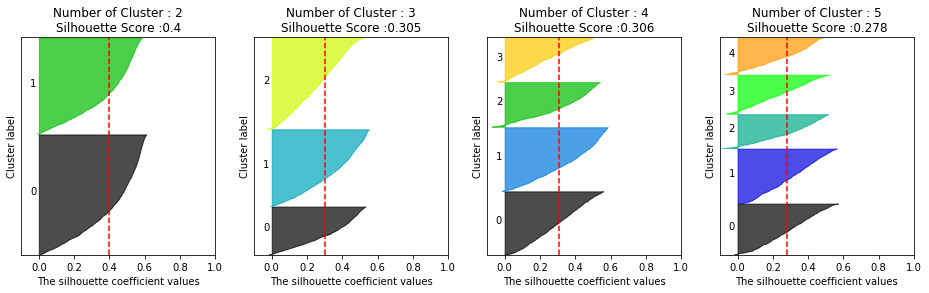

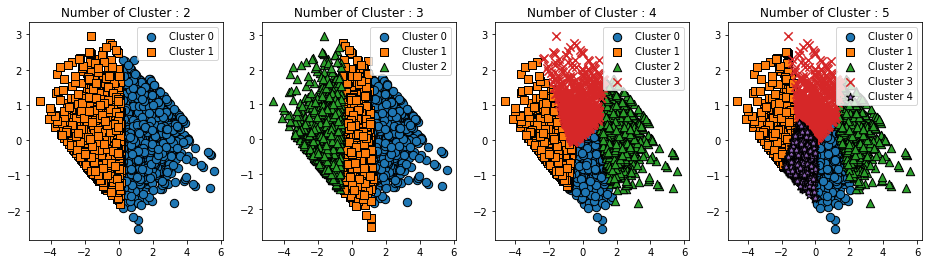

In [68]:
# 로그 변환한 데이터 세트를 기반으로 실루엣 계수와 군집화 구성을 시각화
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

**실루엣 스코어는 로그 변환하기 전보다 떨어지지만 앞의 경우보다 더 균일하게 군집화가 구성됐음을 위 그림을 통해 알 수 있다. 이처럼 왜곡된 데이터 세트에 대해서는 로그 변환으로 데이터를 일차 변환한 후에 군집화를 수행하면 더 나은 결과를 도출할 수 있다.**